In [2]:
!pip install transformers
!pip install torch
!pip install scikit-learn
!pip install pandas
!pip install requests
!pip install spotipy
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

## SETTING UP Spotify DEVELOPER DASHBOARD

1. Create an App: Visit the Spotify Developer Dashboard and log in with your Spotify account.
2. Register Your Application: Click on "Create an App" and provide necessary details like the app name and description.
3. Obtain Credentials: After creating the app, note down the Client ID and Client Secret.
4. Set Redirect URI: In your app settings, add a Redirect URI, such as http://localhost:8888/callback. This URI must match exactly in your code.

In [3]:
client_id = "Your client id"
client_secret = "your secret id"
# redirect_uri = "http://localhost:8000/callback"  # Use the same redirect URI you gave in your Spotify developer App settings
redirect_uri = "http://127.0.0.1:8889/callback" # If above doesnt work, use the redirect_uri in this form.

In [ ]:
import urllib.parse

scope = "user-read-private user-read-email"

auth_url = "https://accounts.spotify.com/authorize?" + urllib.parse.urlencode({
    "client_id": client_id,
    "response_type": "code",
    "redirect_uri": redirect_uri,
    "scope": scope,
    "show_dialog": True
})

print("Open this URL in your browser to authorize the app:\n", auth_url)

In [ ]:
import requests

# copy and paste the authorization code which is in the search bar after code= when you open the url to authorize the app

auth_code = "AQCftY6svCgLgIhaTiQ-iaoA6fapYZusfwR_RA_r3lokldyNl-m6KTLkDt7vYNy9gEEPT52zXtoDHVwdxN_bBusFMtcA72e7iQrH-FWpj8aFuS16xDflmx_QXecjW4KUYLBiwIxYipjAeoZTrh4xmT6oSZ_"
token_url = "https://accounts.spotify.com/api/token"

data = {
    "grant_type": "authorization_code",
    "code": auth_code,
    "redirect_uri": redirect_uri,
    "client_id": client_id,
    "client_secret": client_secret
}

response = requests.post(token_url, data=data)

if response.status_code == 200:
    token_info = response.json()
    access_token = token_info["access_token"]
    refresh_token = token_info["refresh_token"]

    print("✅ Access Token:", access_token)

else:
    print("❌ Error:", response.json())


In [ ]:
headers = {
    "Authorization": f"Bearer {access_token}"
}

response = requests.get("https://api.spotify.com/v1/me", headers=headers)

print(response.json())  # Will return user profile details


In [7]:
import pandas as pd
import spotipy
# from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

def get_playlist_data(playlist_id):

    #sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri="http://127.0.0.1:8889/callback", scope="playlist-read-private user-read-private user-read-playback-state user-library-read"))
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
))


    # Get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id)

    # Extract relevant information
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']


# Since NOV 2024, Audio features are deprecated from the spotify, hence we wont be able to use the audio features, instead we will be using a spotify dataset which contains audio feature.

        try:
            # Get audio features for the track
            #audio_features = sp.audio_features(track_id)[0] if track_id else None

            # Get release date of the album
            album_info = sp.album(album_id) if album_id else None
            release_date = album_info['release_date'] if album_info else None

            # Get popularity of the track
            track_info = sp.track(track_id) if track_id else None
            popularity = track_info['popularity'] if track_info else None

            # Add additional track information to the track data
            track_data = {
                'Track Name': track_name,
                'Artists': artists,
                'Album Name': album_name,
                'Album ID': album_id,
                'Track ID': track_id,
                'Popularity': popularity,
                'Release Date': release_date,
                'Explicit': track_info.get('explicit', None),
                'External URLs': track_info.get('external_urls', {}).get('spotify', None),
                 # 'Danceability': audio_features['danceability'] if audio_features else None,
                 # 'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
                 # 'Energy': audio_features['energy'] if audio_features else None,
                 # 'Key': audio_features['key'] if audio_features else None,
                 # 'Loudness': audio_features['loudness'] if audio_features else None,
                 # 'Mode': audio_features['mode'] if audio_features else None,
                 # 'Speechiness': audio_features['speechiness'] if audio_features else None,
                 # 'Acousticness': audio_features['acousticness'] if audio_features else None,
                 # 'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
                 # 'Liveness': audio_features['liveness'] if audio_features else None,
                 # 'Valence': audio_features['valence'] if audio_features else None,
                 # 'Tempo': audio_features['tempo'] if audio_features else None,

            }

            music_data.append(track_data)

        except Exception as e:
            print(f"Error processing track {track_name}: {str(e)}")


    return pd.DataFrame(music_data)

playlist_id = '0XSQh8s7s0BmEmV1ASexOY' # I have used my personal playlist here

# Call the function to get the music data from the playlist and store it in a DataFrame
music_df = get_playlist_data(playlist_id)

# Display the DataFrame
print(music_df)

print(music_df.isnull().sum())

                                           Track Name  \
0                                                APT.   
1                                          Bad Dreams   
2                                                DtMF   
3                                               Messy   
4                                      That’s So True   
5                                 Tera Hone Laga Hoon   
6                           Ranjha (From "Shershaah")   
7                      Kaise Hua (From "Kabir Singh")   
8                                           Tum Se Hi   
9                                    Ye Tune Kya Kiya   
10                           Satranga (From "ANIMAL")   
11                                           Kesariya   
12                         Raanjhan (From "Do Patti")   
13                                             Kabira   
14                                          O Re Piya   
15                 Agar Tum Saath Ho (From "Tamasha")   
16                             

In [8]:
print(music_df.columns)

Index(['Track Name', 'Artists', 'Album Name', 'Album ID', 'Track ID',
       'Popularity', 'Release Date', 'Explicit', 'External URLs'],
      dtype='object')


# Emotion Classifier

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
# Load tokenizer & model for emotion classification
model_name = "joeddav/distilbert-base-uncased-go-emotions-student"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [11]:
# Emotion labelling function
def get_emotion_label(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)[0]
    labels = [
        "admiration", "amusement", "anger", "annoyance", "approval", "caring", "confusion",
        "curiosity", "desire", "disappointment", "disapproval", "disgust", "embarrassment",
        "excitement", "fear", "gratitude", "grief", "joy", "love", "nervousness", "optimism",
        "pride", "realization", "relief", "remorse", "sadness", "surprise", "neutral"
    ]

    predicted_emotion = labels[torch.argmax(probs).item()]
    return predicted_emotion

##Spotify audio features to make the ml model learn

In [12]:
# Load the Spotify audio features dataset
df_songs = pd.read_csv("/content/light_spotify_dataset.csv")
df_songs.head()

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0


In [13]:
# Normalize column names, it would be easier for us.
df_songs.columns = df_songs.columns.str.strip().str.lower().str.replace(' ', '_')

# Check column names
print(df_songs.columns)

Index(['artist', 'song', 'emotion', 'variance', 'genre', 'release_date', 'key',
       'tempo', 'loudness', 'explicit', 'popularity', 'energy', 'danceability',
       'positiveness', 'speechiness', 'liveness', 'acousticness',
       'instrumentalness'],
      dtype='object')


In [14]:
# 1: Convert the release_date column to numeric year (in my case I have only year in release_date, but this might not be the case with other datasets)
df_songs['release_year'] = pd.to_numeric(df_songs['release_date'], errors='coerce')

# Convert the numeric year to datetime (defaulting to Jan 1st of that year)
df_songs['release_date'] = pd.to_datetime(df_songs['release_year'], format='%Y', errors='coerce')

# Extract year-month for time series plots
df_songs['year_month'] = df_songs['release_date'].dt.to_period('M')

In [15]:
df_songs[['release_year', 'release_date']].dropna().sample(5)

,release_year,release_date
136110,2015,2015-01-01
198767,1992,1992-01-01
94363,2008,2008-01-01
104057,2020,2020-01-01
125439,1972,1972-01-01


In [16]:
#Compute Weighted Popularity
from datetime import datetime

# Compute weighted popularity: newer songs get higher weight
def compute_weighted_popularity(row):
    release_year = row['release_date'].year
    current_year = datetime.now().year
    recency_weight = 1 / (current_year - release_year + 1)
    return row['popularity'] * recency_weight

df_songs['weighted_popularity'] = df_songs.apply(compute_weighted_popularity, axis=1)

In [34]:
# Create decade column
df_songs['decade'] = (df_songs['release_year'] // 10) * 10

# Count of songs per emotion per decade
emotion_decade_counts = df_songs.groupby(['decade', 'emotion']).size().unstack(fill_value=0)

# Normalize to percentage for scaling
emotion_trends_percent = emotion_decade_counts.div(emotion_decade_counts.sum(axis=1), axis=0) * 100

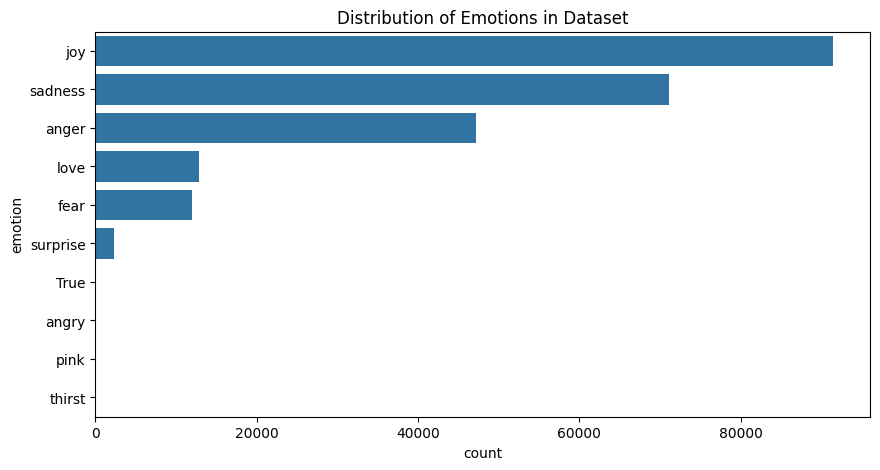

In [17]:
import seaborn as sns
# Bar plot of emotion counts
plt.figure(figsize=(10, 5))
sns.countplot(y='emotion', data=df_songs, order=df_songs['emotion'].value_counts().index)
plt.title("Distribution of Emotions in Dataset")
plt.show()

we can observe the count for joy is the highest followed by sadness and anger which are few emotions we experience regularly on a daily basis.

### Normalising audio features

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Select audio-related features for embedding
feature_cols = ['danceability', 'energy', 'positiveness', 'acousticness', 'tempo']
feature_matrix = df_songs[feature_cols].values

X = df_songs[feature_cols].copy()

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
#fitting nearest neighbor model
from sklearn.neighbors import NearestNeighbors

# Build Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=10, metric='euclidean')
nn_model.fit(X_scaled)


NearestNeighbors(metric='euclidean', n_neighbors=10)

In [35]:
#Mood to vector mapping
# Simple mapping of emotion labels to feature weight vector
def map_emotion_to_feature_vector(emotion):
    # Placeholder: Define rules for mapping
    mood_weights = {
        'joy': [0.8, 0.9, 0.9, 0.2, 0.6],
        'sadness': [0.2, 0.2, 0.1, 0.8, 0.3],
        'anger': [0.4, 0.8, 0.3, 0.3, 0.7],
        'love': [0.7, 0.6, 0.8, 0.3, 0.5],
        'fear': [0.2, 0.3, 0.2, 0.6, 0.4],
        'surprise': [0.7, 0.7, 0.6, 0.2, 0.8]
    }
    return np.array(mood_weights.get(emotion, [0.5]*len(feature_cols)))

def get_emotion_trend_boost(emotion, release_year):
    decade = (release_year // 10) * 10
    if decade in emotion_trends_percent.index and emotion in emotion_trends_percent.columns:
        return emotion_trends_percent.loc[decade, emotion] / 100  # scaled to [0, 1]
    else:
        return 0.1  # fallback for rare/unknown


# Recommendation function based on emotion

def recommend_songs_by_emotion(emotion, top_k=5):
    emotion_vector = map_emotion_to_feature_vector(emotion)
    distances, indices = nn_model.kneighbors([emotion_vector], n_neighbors=50)

    results = df_songs.iloc[indices[0]].copy()
    results['similarity_score'] = 1 / (1 + distances[0])  # inverse distance → similarity

    # Combine with weighted popularity
    results['trend_boost'] = results['release_year'].apply(lambda y: get_emotion_trend_boost(emotion, y))

    results['final_score'] = (
        0.6 * results['similarity_score'] +
        0.3 * results['weighted_popularity'] +
        0.1 * results['trend_boost']
    )


    results = results.sort_values(by='final_score', ascending=False)
    return results[['artist', 'song', 'emotion', 'popularity', 'release_date', 'final_score']].head(top_k)


In [36]:
# To recommend similar songs based on the song you have provided

def recommend_similar_songs_to_input(song_name, num=5):
    idx = df_songs[df_songs['song'].str.lower() == song_name.lower()].index
    if idx.empty:
        return f"❌ Song '{song_name}' not found in dataset."

    vec = feature_matrix[idx[0]].reshape(1, -1)
    distances, indices = nn_model.kneighbors(vec, n_neighbors=num + 1)
    results = df_songs.iloc[indices[0][1:]].copy()

    results['similarity_score'] = 1 / (1 + distances[0][1:])
    results['final_score'] = (
        0.6 * results['similarity_score'] +
        0.3 * results['weighted_popularity'] +
        0.1 * results['trend_boost']
    )

    results = results.sort_values(by='final_score', ascending=False)
    return results[['artist', 'song', 'popularity', 'release_date', 'final_score']]


In [37]:
# User input: detect emotion
text = input("Tell me how you're feeling today (you can paste a journal or just describe your mood): ")
emotion = get_emotion_label(text)
print(f"\n🎯 Detected Emotion: {emotion}")

# Recommend songs based on NLP-detected emotion
recommendations = recommend_songs_by_emotion(emotion, top_k=5)
print("\n🎧 Recommended Songs:\n")
print(recommendations[['artist', 'song', 'emotion', 'popularity', 'release_date']])


Tell me how you're feeling today (you can paste a journal or just describe your mood): i feel like dancing

🎯 Detected Emotion: excitement

🎧 Recommended Songs:

               artist                  song  emotion  popularity release_date
165386   Jamie Miller    Heres Your Perfect      joy          76   2021-01-01
157641  Justin Bieber                E.T.A.     fear          56   2020-01-01
62437      Young Thug         Stupid/Asking    anger          45   2021-01-01
235644            25K  Pheli Makaveli Intro      joy          41   2021-01-01
74493      Trap Manny                 Alone  sadness          43   2019-01-01


provides Top 3 Emotions

In [38]:
def get_emotion_scores(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)[0]

    labels = [
        "admiration", "amusement", "anger", "annoyance", "approval", "caring",
        "confusion", "curiosity", "desire", "disappointment", "disapproval",
        "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
        "joy", "love", "nervousness", "optimism", "pride", "realization", "relief",
        "remorse", "sadness", "surprise", "neutral"
    ]

    return dict(zip(labels, probs.tolist()))

# Example
top_emotions = sorted(get_emotion_scores(text).items(), key=lambda x: x[1], reverse=True)[:3]
print("\n💡 Top 3 predicted emotions:")
for emo, score in top_emotions:
    print(f"{emo}: {score:.2f}")



💡 Top 3 predicted emotions:
excitement: 0.21
desire: 0.09
curiosity: 0.09


# Time series anlaysis

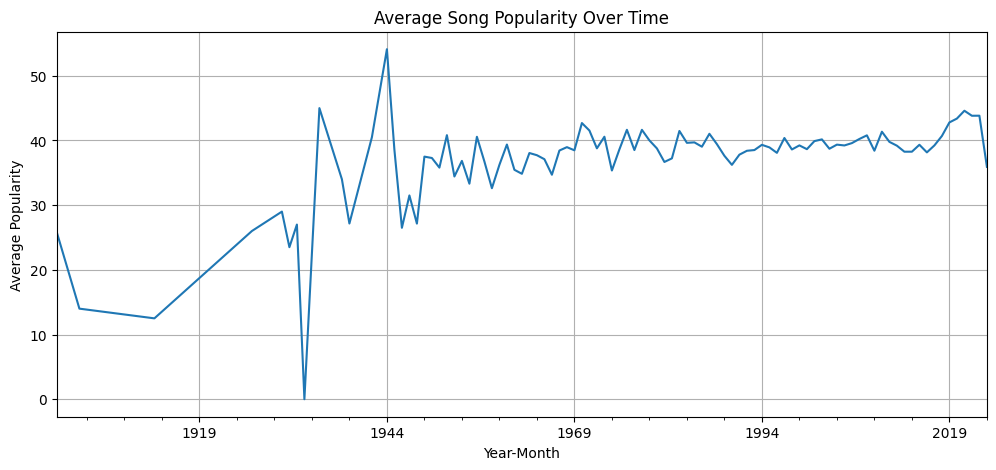

In [24]:
#Visualizing Popularity Over Time
# Group popularity over time
monthly_popularity = df_songs.groupby('year_month')['popularity'].mean()

# Plot average popularity per month
monthly_popularity.plot(figsize=(12, 5), title='Average Song Popularity Over Time')
plt.ylabel('Average Popularity')
plt.xlabel('Year-Month')
plt.grid()
plt.show()



X-axis represents time from the early 1900s to 2020+

Y-axis represents average Spotify popularity score for songs released in that period.
Popularity ranges from near 0 to 50+ over time.

1. Pre-1940s: Sparse & Volatile

Popularity scores are erratic, likely due to low data density in older years.
Sudden spikes and dips (e.g., near 1940) suggest dataset imbalance — only a handful of songs may exist per year.

2. Post-1960s Onward: Smoother Growth

From the 1960s, data stabilizes and trends become more consistent.
Average popularity hovers around 35–45, with mild fluctuations.
This likely reflects the rise of recorded music distribution, making the dataset denser and trends more reliable.

3. Recent Rise (Post-2010)

Popularity shows an upward trend, peaking near 2020.
Could be influenced by various factors like Streaming platforms boosting modern song exposure or More user interactions driving higher popularity scores.


In [25]:
# Emotion-based time trend
df_songs['release_date'] = pd.to_datetime(df_songs['release_date'], errors='coerce')
df_songs['year'] = df_songs['release_date'].dt.year
df_songs = df_songs.dropna(subset=['emotion', 'year'])

In [26]:
# aggregating emotion counts by year

# Count the number of songs per emotion each year
emotion_trends = df_songs.groupby(['year', 'emotion']).size().unstack(fill_value=0)

# Normalize counts to percentages
emotion_trends_percent = emotion_trends.div(emotion_trends.sum(axis=1), axis=0) * 100

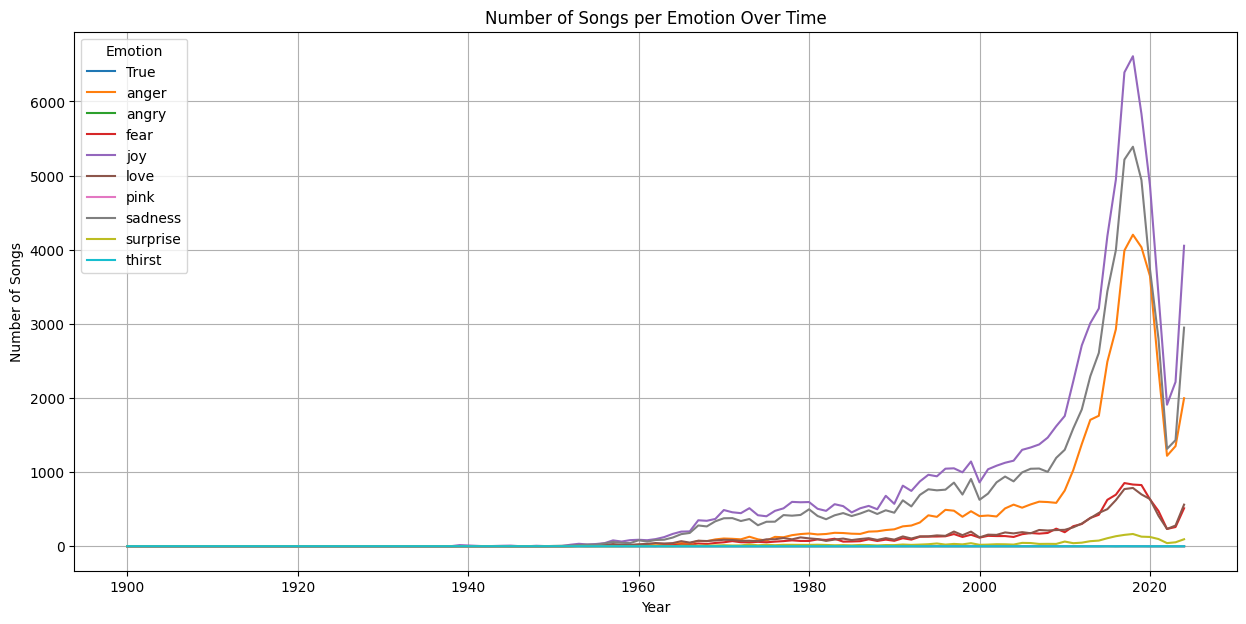

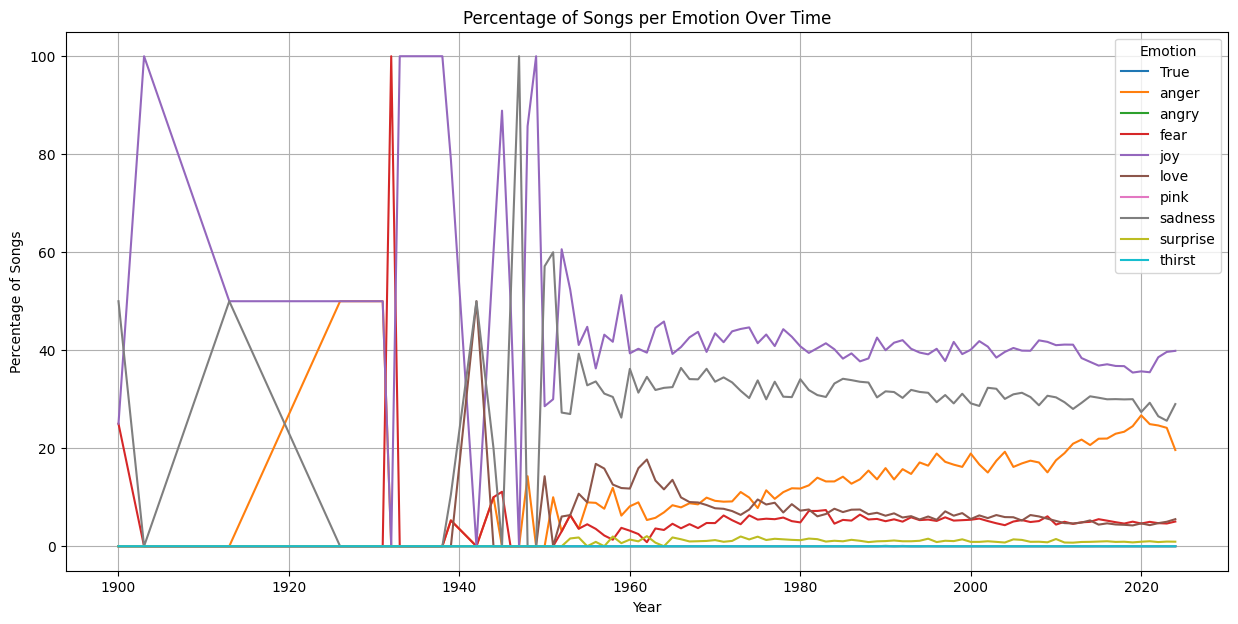

In [27]:
import matplotlib.pyplot as plt

# Plot absolute counts
emotion_trends.plot(figsize=(15, 7))
plt.title('Number of Songs per Emotion Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Emotion')
plt.grid(True)
plt.show()

# Plot percentages
emotion_trends_percent.plot(figsize=(15, 7))
plt.title('Percentage of Songs per Emotion Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Songs')
plt.legend(title='Emotion')
plt.grid(True)
plt.show()


1. Dominance of joy and sadness: joy has consistently been the most frequent emotion in music over time. Sadness closely follows, especially post-2010s.
This reflects a duality in popular music—either uplifting or melancholic.

2. Rapid Rise Post-2000: A dramatic rise in all emotions post-2000.
Likely due to the explosion of digital music, streaming platforms, and better metadata tagging. We can observe emotions like anger, fear, and love also saw growth but at a smaller scale.

3. Sharp Drop Around 2021–2022: All emotion lines drop suddenly post-2020.
This is likely not a real-world drop, but due to incomplete or under-sampled recent years in our dataset.

4. Low-Frequency/Outlier Labels: Emotions like thirst, pink, and True suggest possible labeling noise or misclassification. These could be cleaned up or mapped to main emotions.

5. Emergence of anger and fear post-2000: This could be due to Cultural or genre shifts (e.g., rise of rap, trap, and metal) might explain the growing number of emotionally intense songs.

In [30]:
df_songs['release_date'] = pd.to_datetime(df_songs['release_date'], errors='coerce')
df_songs = df_songs.dropna(subset=['release_date', 'popularity'])

df_songs['year_month'] = df_songs['release_date'].dt.to_period('M')

# Group by month
monthly_popularity = df_songs.groupby('year_month')['popularity'].mean()

# Convert to datetime index
monthly_popularity.index = monthly_popularity.index.to_timestamp()


<ipython-input-31-7c58ba684d29>:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x1000 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


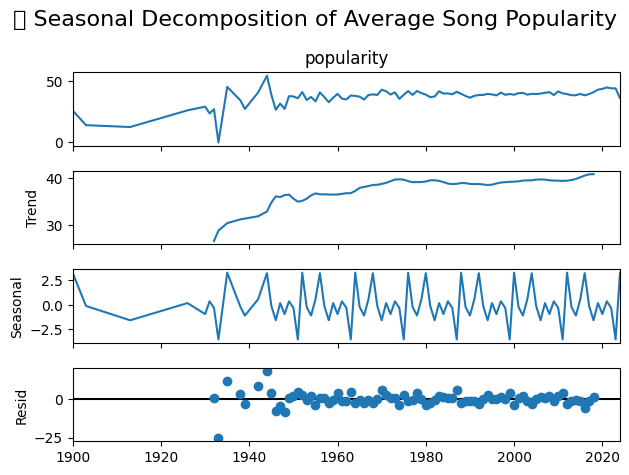

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose (you can also try model='multiplicative')
decomposition = seasonal_decompose(monthly_popularity, model='additive', period=12)

# Plot
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle("📉 Seasonal Decomposition of Average Song Popularity", fontsize=16)
plt.tight_layout()
plt.show()

Interpretation of the graph

1. Popularity: This is the raw time series — the average popularity of songs released over time (grouped monthly).
we can observe spikes around 1940-1950, post 1980 the popularity almost stabilises

2. Trend: There is a gradual rise from 1940 to 2010 2hich suggests more prefernce for popular songs.

3. Seasonal: We have assumed yearly seasonality here which means it shows how each months song popularity typically deviates from the average, across years.
the values +2.5 AND -2.5 are the magnitude of seasonal deviation from the mean trend

4. Residual: Outliers around the 1930s to 1950s suggest anomalies which could be due to major cultural shifts like post-war musical booms.